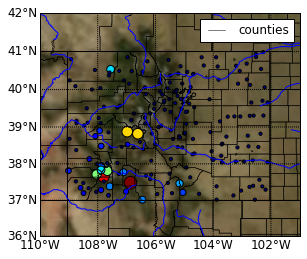

In [6]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

%matplotlib inline

# Create the map
m = Basemap(llcrnrlon=-110.0,llcrnrlat=36.0,\
            urcrnrlon=-101.0,urcrnrlat=42.0,\
            projection='merc',resolution='h')
m.bluemarble()
m.drawcoastlines(linewidth=0.5)
m.drawcounties(linewidth=0.5)
m.drawstates(linewidth=0.5)
m.drawrivers(linewidth=1, linestyle='solid', color='b')

#Draw parallels and meridians
parallels = np.arange(0.,90.,1.)
m.drawparallels(parallels,labels=[True,False,False,False], fontsize = 12)
meridians = np.arange(10.,350.,2.)
m.drawmeridians(meridians,labels=[True,True,False,True], fontsize = 12)

#read in the data
df_metadata = pd.read_csv('metadata.csv')
lats = np.array(df_metadata.Latitude)
lons = np.array(df_metadata.Longitude)

df_precip = pd.read_csv('COPrecip.csv')

# df_dateinfo = pd.read_csv('DateInfo.csv')
# mo = np.array(df_dateinfo.mo)
# da = np.array(df_dateinfo.da)
# yr = np.array(df_dateinfo.yr)

x,y = m(lons, lats)

data = df_precip.iloc[[30000]].replace("NaN", 0).values[0]
data = np.delete(data, 0)

# print len(data)
# print len(lons)
# print len(lats)

sizes = 10*data + 10

sc = plt.scatter(x, y, c=data, s=sizes)

plt.legend()